In [2]:
R.version.string

[1] "R version 4.4.2 (2024-10-31)"

In [3]:
install.packages("png", dependencies = TRUE)
  library(png)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# print(installed.packages())

### Simulation in R

Assignment made by:
- David Linger 04/03/2023
- student#: 2741629

## Question: A

---

Create three histograms side by side. The leftmost one is a histogram with 50
draws from the uniform distribution on [0, 1]. You can generate this histogram as follows:
- x <- runif(50)
- hist(x, main=’Histogram of 50 draws’)

Create the middle histogram based on 500 draws, and the rightmost histogram
based on 5000 draws. To get the three histograms in one figure, you can use the
command par(mfrow=c(1,3)) before creating the 3 histograms.

In [81]:
# Set up the PNG with desired dimensions
png("assignment1A.png", width= 1200, height = 400)

# initialize data for histograms
x <- runif(50)
y <- runif(500)
z <- runif(5000)

# Set up the plotting area for 3 plots in a row
par(mfrow=c(1,3))

# Create the histograms
hist(x, main='Histogram of 50 Draws', col= "lightblue")
hist(y, main='Histogram of 500 Draws', col= "lightgreen")
hist(z, main='Histogram of 5000 Draws', col= "pink")


# Close off the png device
dev.off()


pdf 
  2

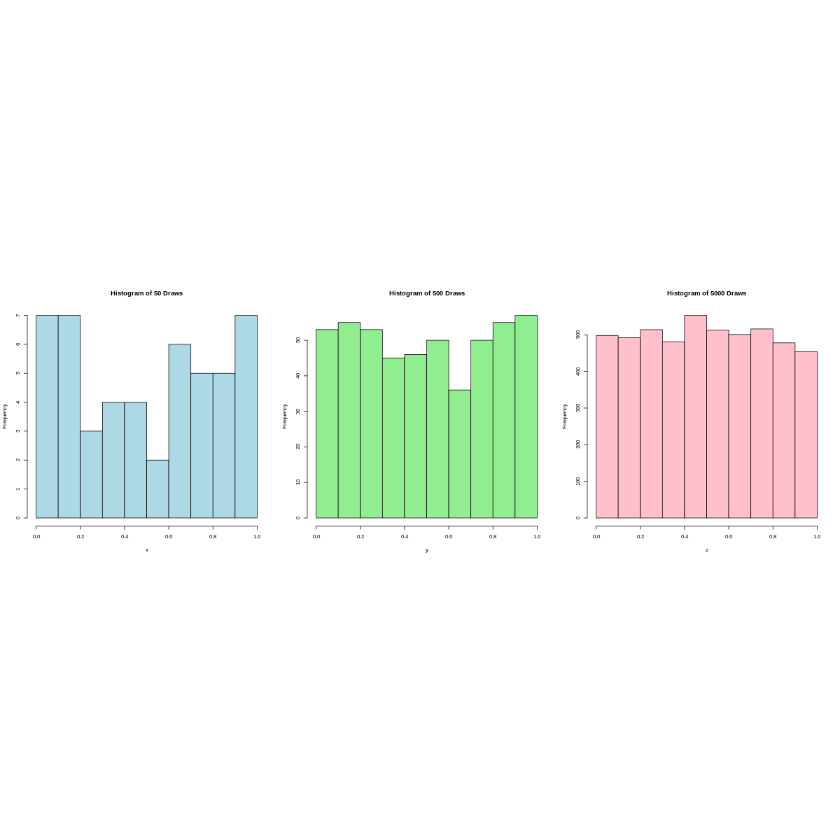

In [82]:
# Show the png created
library(png)
    img <- readPNG("assignment1A.png")
    grid::grid.raster(img)

### If the png is not readable/findable for some reason, please uncomment this code cell Below!

In [85]:
# # initialize data for histograms
# x <- runif(50)
# y <- runif(500)
# z <- runif(5000)

# # Set up the plotting area for 3 plots in a row
# par(mfrow=c(1,3))

# # Create the histograms
# hist(x, main='Histogram of 50 Draws', col= "lightblue")
# hist(y, main='Histogram of 500 Draws', col= "lightgreen")
# hist(z, main='Histogram of 5000 Draws', col= "pink")


### Throwing a coin and the arcsin law
In this assignment we will simulate a simple probabilistic experiment.

The experiment
goes as follows:
- We flip a coin: if the outcome is heads, we receive 1 euro, if the outcome is tails,
we pay 1 euro.
- We start with 0 euros (if we have to pay, our balance becomes negative).
- We repeat this experiment 10 times a day for a year, so in total 3650 times.
Let S be the random variable that equals -1 when flipping tails, and 1 when flipping
heads. We assume the coin is fair.

Let S be the random variable that equals -1 when flipping tails, and 1 when flipping
heads. We assume the coin is fair.

## Question: B


---


- Think about how you can simulate the random variable S using a uniformly dis-
tributed random variable U . Write a function sim.coin(n), that generates n
realizations of the random variable S. The command ifelse can be useful for
this.

# Answer:
- generate random numbers between 0 and 1  from a uniform distribution.
- if the number generated U is less than 0.5 S will be assigned to -1, if it is greater or equal to 0.5 assign S to 1.

In [7]:
sim.coin <- function(n) {
  # Create n random numbers from a uniform distribution betwee 0 and 1
  U <- runif(n)
  # If U < 0.5 -> S = -1, if U >= 0.5 -> S = 1
  S <- ifelse(U < 0.5, -1, 1)
  # Return the vector
  return(S)
}

## Question: C


---


- Over a year, we flip 3650 times. We can simulate the development of our balance
using cumsum(sim.coin(n)). Create a figure in which the vertical axis shows the
balance against the horizontal axis showing the numbers 1 to 3650. Provide the
graph with an appropriate title and axis labels.

Answer:

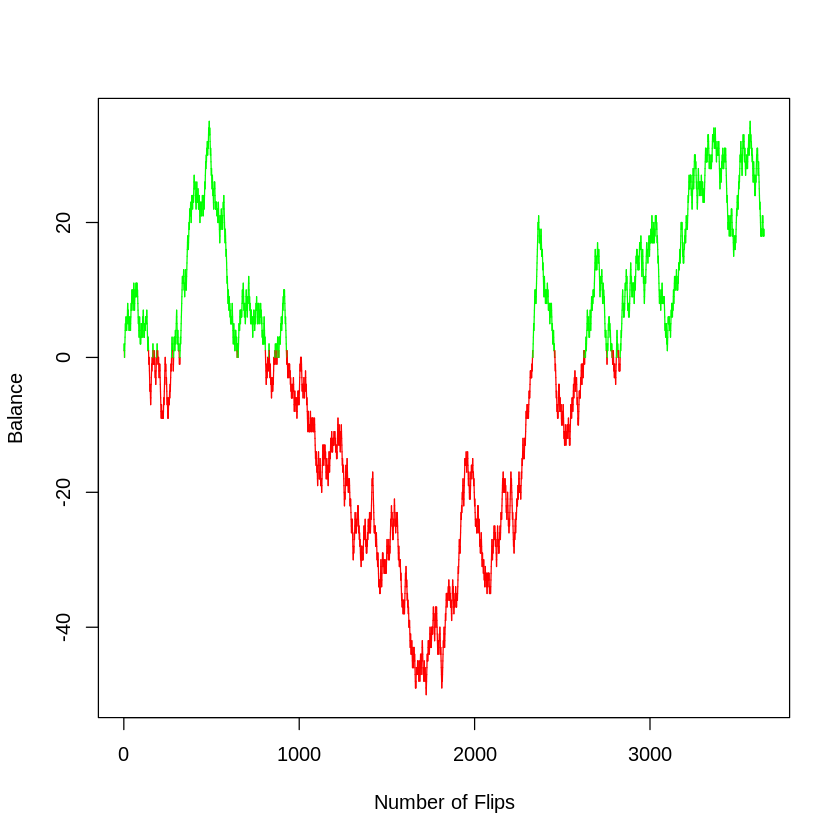

In [58]:
# Set seed to enable reproducablity
# set.seed(115)
# set.seed(42)
set.seed(6)


# using previously created function to simulate coinflips
flips = sim.coin(3650)

# Calculate the cumulative balance
balance <- cumsum(flips)

# # Create the plot (single coloring)
# plot(balance,
#   type = "l", # line plot
#   col = "blue",
#   main = "Balance Development Over a Year", #Title
#   xlab = "Number of Flips", # X-axis Lable,
#   ylab = "Balance" # Y-axis Lable
# )

# Conditional colouring for readability.
# type "n" for plotting with no datapoints.
# Create the plot with conditional coloring
plot(1, type = "n", xlim = c(1, length(balance)), ylim = range(balance),
     xlab = "Number of Flips", ylab = "Balance")  # Empty plot with axes

# Loop through the balance vector vals and draw segments
for (i in 2:length(balance)) {
  color <- ifelse(balance[i] > 0, "green", "red")  # Choose color based on balance
  segments(i - 1, balance[i - 1], i, balance[i], col = color) # segments is used to draw line segments on existing plot
}

## Question: D


---


- Calculate the fraction of time that we have a positive balance over a year. We
expect that the balance is positive about half the time and negative the other half.
Is this the case in your generated realization?

## Answer:

- Overall in the many simulations the results varied wildly which is why I set a seed to enable reproducibility and to point out the differences between simulations.
- At seed(6) the fraction is split right down the middle at approximately 51%.
- At seed(42) the number of positive flips is at 8%
- At seed(115) the positive flips are at 75%

There appears to be a noticably significant disparity of outcome which doesn't conform to the expectation that the flips would be split 50/50, and overall I came across more examples of outcomes that tended towards the extreme than towards the middle of the distribution.

The law of large numbers tells us that as the sample size increases the coin flips should be closer to a 50/50 distribution. However, in the case of my function it does not reflect the tendency towards the norm when I attempted to increase sample size N by a factor of 10 up to 1000.

This may be due to the the limitation of the runif function not generating truly random numbers. Or perhaps the sim.coin function I created should be re-evaluated. Regardless I believe troubleshooting  and optimizating the function, would be outside of the scope of the assignment.

In [10]:
# Count the number of times the balance is positive
positive_balance <- sum(balance > 0)

# Calculate the fraction of time with a positive balance
fraction_positive <- positive_balance / 3650

# Print the fraction
print(fraction_positive)

[1] 0.5052055


## Question: E


---


- A graph where the balance is positive only 5 percent of the time seems highly
unlikely. Make a guess at the probability of this happening.

## Answer:
Whilst unlikely I am certain it is not impossible, as my previous analysis shows there is a great range of possiblity of outcome for the coin flips. The probability of the number of positive flips staying under the 5% threshold is a complex analytical problem but can solved by approximation using the Arcsine Law, amongst other methods. Since this will be used in the follow-up questions I'm goin to make a random guess and say less than 5% of the time, I'm basing this on the assumption that the coinflip outcomes for n = 3650 propagate on a Gaussian distribution, and the probability that the threshold stays under 5% tends towards the extreme end of the distribution.  

## Question: F


---


- To get a better intuition for the situation, we add three more simulations. Create
a graph with the total of four simulations. Use the command lines to add the
simulations. Ensure that the y-axis scale is such that you can clearly see all four
simulations.

## Answer: *In code*

In [79]:
# Set up the PNG with desired dimensions
png("assignment1F.png", width= 1600, height = 400)

# Set op the plotting area
par(mfrow= c(1, 4)) # Arrange the plots 2x2

# Set a common y-axis for all plots
y_range <- c(-100, 100)

# Fucntion to run a single simultation and plot it
run_simulation <- function(seed_value) {
  set.seed(seed_value)
  flips <- sim.coin(3650)
  balance <- cumsum(flips)
  plot(balance,
    type = "l",
    main = paste("Seed:", seed_value),
    col = "blue",
    xlab = "Number of flips",
    ylab = "Balance",
    ylim = y_range)

}

run_simulation(6)
run_simulation(42)
run_simulation(115)
run_simulation(123)

dev.off()

pdf 
  2

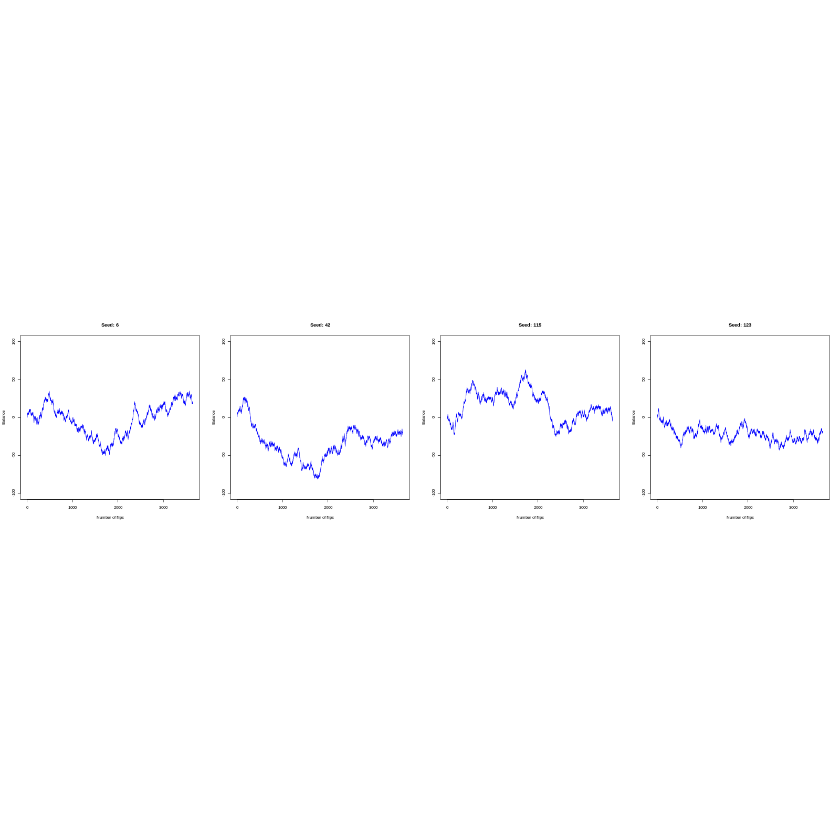

In [80]:
# Show the png created
library(png)
    img <- readPNG("assignment1F.png")
    grid::grid.raster(img)

### If the png is not readable/findable for some reason, please uncomment code cell below!

In [ ]:
### If the png is not readable/findable for some reason, please uncomment this cell!
# # Set op the plotting area
# par(mfrow= c(1, 4)) # Arrange the plots 2x2

# # Set a common y-axis for all plots
# y_range <- c(-100, 100)

# # Fucntion to run a single simultation and plot it
# run_simulation <- function(seed_value) {
#   set.seed(seed_value)
#   flips <- sim.coin(3650)
#   balance <- cumsum(flips)
#   plot(balance,
#     type = "l",
#     main = paste("Seed:", seed_value),
#     xlab = "Number of flips",
#     ylab = "Balance",
#     ylim = y_range)

# }

# run_simulation(6)
# run_simulation(42)
# run_simulation(115)
# run_simulation(123)

## Question: G


---


- We repeat the entire experiment 1000 times and calculate the fraction of time
that the balance is positive each year. Store these fractions in a vector pos.vec.
This can be done with a for-loop. Create a histogram of the values in the vector
pos.vec. Use the option probability=TRUE when creating the histogram so that
the histogram is scaled and the total area under the bars equals 1.

##Answer:
- This experiment shows how over the course of many repetitions the outcomes of the coinflips over a year match the shape of a U-shape Arcsine Distribution. Where the probability density is higher towards the extremes.

#### From Wikipedia

"In a fair coin toss random walk, the probability for the time of the last visit to the origin is distributed as an (U-shaped) arcsine distribution.[3][4] In a two-player fair-coin-toss game, a player is said to be in the lead if the random walk (that started at the origin) is above the origin. The most probable number of times that a given player will be in the lead, in a game of length 2N, is not N. On the contrary, N is the least likely number of times that the player will be in the lead. The most likely number of times in the lead is 0 or 2N (following the arcsine distribution)." - https://en.wikipedia.org/wiki/Arcsine_distribution

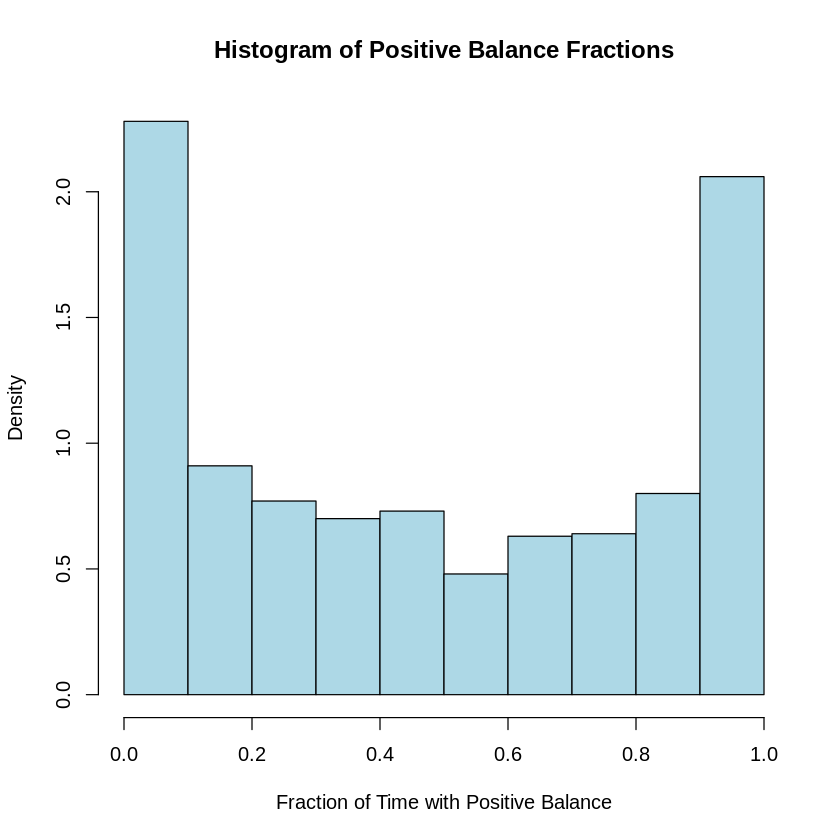

In [78]:
# repetitions
num_cycles <- 1000

# initialize an empty vector to store the fractions
pos.vec <- numeric(num_cycles)

# loop throught all repetitions
for (i in 1:num_cycles) {
  # Simulate coin flips
  flips <- sim.coin(3650)

  # calculate the balance
  balance <- cumsum(flips)

  # calculate fraction of the time with pos balance
  pos.vec[i] <- sum(balance > 0) / 3650
}

# Create the hist of the fraction
hist(pos.vec,
    probability = TRUE,
    col = "lightblue",
    main = "Histogram of Positive Balance Fractions",
    xlab = "Fraction of Time with Positive Balance",
    ylab = "Density"
)

## Question: H


---


Theoretically, it can be shown that the histogram is well approximated by the
curve
- f (x) = 1
- π * sqrt(x(1 − x)), x ∈ (0, 1).

In other words, if X is the fraction of time that the balance is positive, then
the probability density function of X is well approximated by f . This is called
the arcsin law because the cumulative distribution function corresponding to f
includes the arcsin function. Add the theoretical curve f to the histogram just
created.

In [37]:
# initialize a function that computes the arcsin law
arcsine_density <- function(x) {
  1/ (pi * sqrt(x *(1 - x)))
}

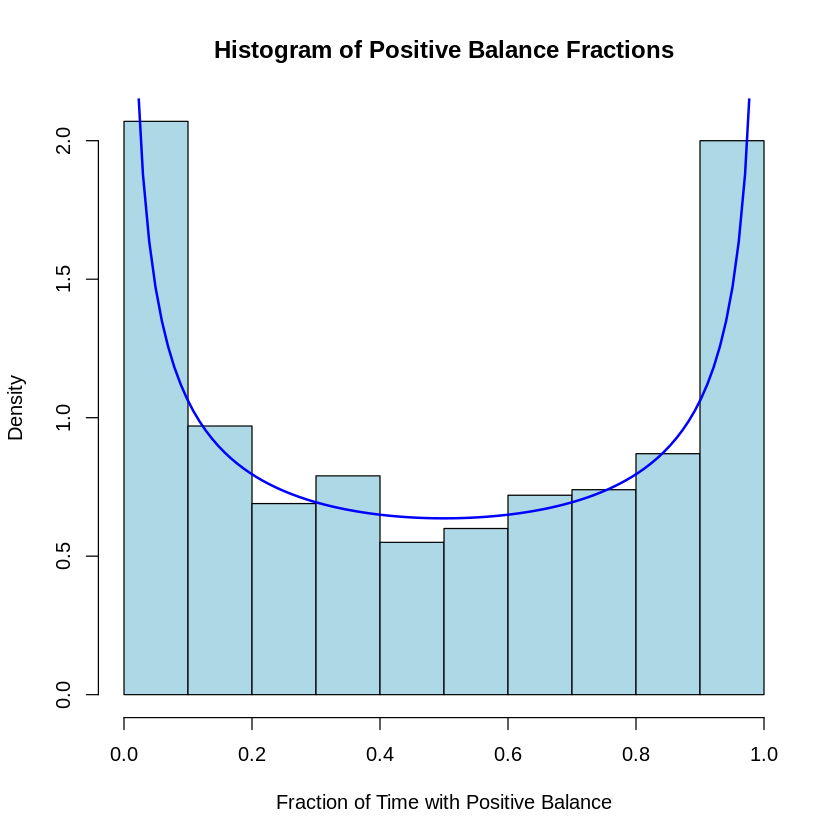

In [77]:
# Create the hist of the fraction (new call because of new Cell)
hist(pos.vec,
    probability = TRUE,
    col = "lightblue",
    main = "Histogram of Positive Balance Fractions",
    xlab = "Fraction of Time with Positive Balance",
    ylab = "Density"
)

curve(arcsine_density(x), # the function containing the theoretical curve
    add=TRUE,
    col = "blue",
    lwd = 2,
    from = 0.01,
    to = 0.99
)

## Question: I


---


Calculate the mean of the simulated fractions of time that the balance is positive.

###Answer: *In code*

In [43]:
# compute the mean
mean_time_positive <- mean(pos.vec)

# print the mean
print(mean_time_positive)

[1] 0.4911093


## Question: J


---


Now calculate the probability that we have a positive balance less than 5% of
the time. Do this both based on the 1000 simulations and on the theoretical
approximation. Indicate how well the results match your intuition and your answer
to question E.

### Answer:
we can see the probability of the outcome being under or at the 5% threshold using Integration. we can integrate the density function over the range 0 to 0.05 to find the probabilty of having a positive balance less than or equal to 5%. For this I will use the integration function in R

In [94]:
# Calculate the probability
probability <- integrate(arcsine_density, lower = 0, upper = 0.05)

# print prob
print(probability$value)

[1] 0.1435663


The probability is around 14% which is significantly higher than my initial estimate of 5% which was based on the false assumption that the outcomes would propagate on a normal distribution. Instead we've learned that this particular problem propagates on the Arcsine Distribution and thus has a different outcome. Whilst the mean might still be 50%, a balanced outcome has a significantly lower density than the extremes making it less likely to occur. Rather the distribution density is highest at its extremes and decreases towards its center.

David Linger 04/03/2023
student#: 2741629
